In [22]:
#import library
import cv2 #openCV image 
import numpy as np #array 
import string 
import os 
import matplotlib.pyplot as plt 

In [23]:
#ASCII CONVERSION 
d = {chr(i):i for i in range (255)} #chracter to ascii 
c = {i:chr(i) for i in range(255)}  #ascii to character 

In [24]:
key=input("enter key ") #key
text=input("enter text message") #Message to Hide 
print("key:",key)
print("Text:",text)

enter key  80120
enter text message Recon


key: 80120
Text: Recon


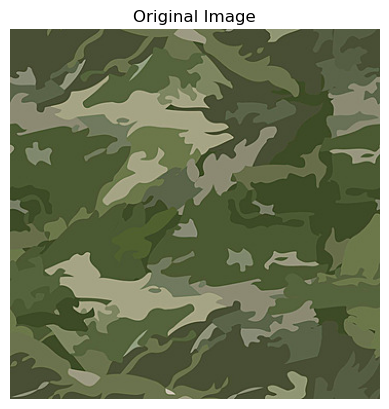

Image shape(Height,Width,Channels): (360, 360, 3)


In [25]:
#load the image 
image_path =  r"C:\Users\Anukanna\Downloads\military.jpg"
x=cv2.imread(image_path)

#Convert to RGB for matplotlib visualization
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)

#Show the original image 
plt.imshow(xrgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

#Display image shape
print("Image shape(Height,Width,Channels):",x.shape)

In [34]:
#Show ASCII Values of text and key 
text_ascii=[d[ch] for ch in text] #list of ascii values of text characters 
key_ascii=[d[ch] for ch in key]   #list of ascii values of key
print(text_ascii)
print(key_ascii)

[82, 101, 99, 111, 110]
[56, 48, 49, 50, 48]


In [35]:
#Make a copy of image to modify
x_enc=x.copy()

In [36]:
n,m,z=0,0,0 #pixel row,column,channel
l=len(text) #number of characters to encode
kl=0        #index for key

In [37]:
#Encrypt and modify pixel values with XOR + pixel tweaking
for i in range(l):
    orig_val = x_enc[n, m, z]
    xor_val = d[text[i]] ^ d[key[kl]]
    x_enc[n, m, z] = xor_val
    print(f"EMBEDDING '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = { xor_val} at pixel ({n},{m},{z}) [Original = {orig_val}]")
    
    # Pixel Tweaking Layer (modifies nearby pixel slightly to add noise)
    tweak_val = (xor_val % 3) - 1  # Result: -1, 0, or +1
    # Move to next pixel channel to tweak
    tz = (z + 1) % 3
    tm = m
    tn = n
    if tz == 0:
        tm += 1
        if tm == x_enc.shape[1]:
            tm = 0
            tn += 1
    # Apply tweak
    if tn < x_enc.shape[0] and tm < x_enc.shape[1]:
        original_tweak_pixel = x_enc[tn, tm, tz]
        x_enc[tn, tm, tz] = np.clip(original_tweak_pixel + tweak_val, 0, 255)
        print(f"Pixel tweak at ({tn},{tm},{tz}): Original={original_tweak_pixel}, Tweak={tweak_val}, New={x_enc[tn, tm, tz]}")
    
    n += 1
    m += 1
    z = (z + 1) % 3
    m = (m + 1) % 3
    kl = (kl + 1) % len(key)


EMBEDDING 'R' (ASCII 82) XOR '8' (ASCII 56) = 106 at pixel (0,0,0) [Original = 53]
Pixel tweak at (0,0,1): Original=79, Tweak=0, New=79
EMBEDDING 'e' (ASCII 101) XOR '0' (ASCII 48) = 85 at pixel (1,2,1) [Original = 79]
Pixel tweak at (1,2,2): Original=73, Tweak=0, New=73
EMBEDDING 'c' (ASCII 99) XOR '1' (ASCII 49) = 82 at pixel (2,1,2) [Original = 73]
Pixel tweak at (2,2,0): Original=53, Tweak=0, New=53
EMBEDDING 'o' (ASCII 111) XOR '2' (ASCII 50) = 93 at pixel (3,0,0) [Original = 53]
Pixel tweak at (3,0,1): Original=79, Tweak=-1, New=78
EMBEDDING 'n' (ASCII 110) XOR '0' (ASCII 48) = 94 at pixel (4,2,1) [Original = 79]
Pixel tweak at (4,2,2): Original=73, Tweak=0, New=73


In [38]:
#Encrypt and embed using LSB
for i in range(l):
    char_val = d[text[i]]^d[key[kl]]
    for bit_pos in range(8):
        bit=(char_val >>(7-bit_pos)) & 1 
        org_val = x_enc[n,m,z]
        x_enc[n,m,z] = (org_val & ~1)| bit 
        print(f"Embedding bit {bit} of '{text[i]}' at ({n},{m},{z}) original = {org_val} new={x_enc[n,m,z]} ")
        
        z = (z+1)%3
        if z == 0:
            m += 1
            if m == x_enc.shape[1]:
                m = 0
                n += 1
    kl = (kl+1) % len(key)

Embedding bit 0 of 'R' at (5,1,2) original = 73 new=72 
Embedding bit 1 of 'R' at (5,2,0) original = 53 new=53 
Embedding bit 1 of 'R' at (5,2,1) original = 79 new=79 
Embedding bit 0 of 'R' at (5,2,2) original = 73 new=72 
Embedding bit 1 of 'R' at (5,3,0) original = 53 new=53 
Embedding bit 0 of 'R' at (5,3,1) original = 79 new=78 
Embedding bit 1 of 'R' at (5,3,2) original = 73 new=73 
Embedding bit 0 of 'R' at (5,4,0) original = 53 new=52 
Embedding bit 0 of 'e' at (5,4,1) original = 79 new=78 
Embedding bit 1 of 'e' at (5,4,2) original = 73 new=73 
Embedding bit 0 of 'e' at (5,5,0) original = 53 new=52 
Embedding bit 1 of 'e' at (5,5,1) original = 79 new=79 
Embedding bit 0 of 'e' at (5,5,2) original = 73 new=72 
Embedding bit 1 of 'e' at (5,6,0) original = 53 new=53 
Embedding bit 0 of 'e' at (5,6,1) original = 79 new=78 
Embedding bit 1 of 'e' at (5,6,2) original = 73 new=73 
Embedding bit 0 of 'c' at (5,7,0) original = 53 new=52 
Embedding bit 1 of 'c' at (5,7,1) original = 79 

In [39]:
#Decryption
n,m,z = 0,0,0
kl = 0
l = len(text)
decrypt = ""
for i in range(l):
    val = 0
    for bit_pos in range(8):
        bit = x_enc[n,m,z] & 1
        val = (val << 1)  | bit 
        print(f"Reading bit {bit} from ({n},{m},{z})")
        z = (z+1) % 3
        if z == 0:
            m = m+1
            if m == x_enc.shape[1]:
                m = 0
                n += 1
    orig_char = c[val ^ d[key[kl]]]
    decrypt += orig_char
    print(f"Decrypted byte: {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    kl=(kl+1) % len(key)
print("Decrypt text:",decrypt)

Reading bit 0 from (0,0,0)
Reading bit 1 from (0,0,1)
Reading bit 1 from (0,0,2)
Reading bit 1 from (0,1,0)
Reading bit 1 from (0,1,1)
Reading bit 1 from (0,1,2)
Reading bit 1 from (0,2,0)
Reading bit 1 from (0,2,1)
Decrypted byte: 127 XOR 56 = 71 -> 'G'
Reading bit 1 from (0,2,2)
Reading bit 1 from (0,3,0)
Reading bit 1 from (0,3,1)
Reading bit 1 from (0,3,2)
Reading bit 1 from (0,4,0)
Reading bit 1 from (0,4,1)
Reading bit 1 from (0,4,2)
Reading bit 1 from (0,5,0)
Decrypted byte: 255 XOR 48 = 207 -> 'Ï'
Reading bit 1 from (0,5,1)
Reading bit 1 from (0,5,2)
Reading bit 1 from (0,6,0)
Reading bit 1 from (0,6,1)
Reading bit 1 from (0,6,2)
Reading bit 1 from (0,7,0)
Reading bit 1 from (0,7,1)
Reading bit 1 from (0,7,2)
Decrypted byte: 255 XOR 49 = 206 -> 'Î'
Reading bit 1 from (0,8,0)
Reading bit 1 from (0,8,1)
Reading bit 1 from (0,8,2)
Reading bit 1 from (0,9,0)
Reading bit 1 from (0,9,1)
Reading bit 1 from (0,9,2)
Reading bit 1 from (0,10,0)
Reading bit 1 from (0,10,1)
Decrypted byte:

In [40]:
#Decrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range (l):
    val = x_enc[n,m,z]
    orig_char = c[val^d[key[kl]]]   #new encrypted xor ascii key
    decrypt += orig_char
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    
    n += 1
    m += 1
    z = (z+1) % 3
    m = (m+1) % 3
    kl = (kl+1) % len(key)
    
print("Decrypted Text:",decrypt)

Decrypting pixel (0,0,0): 106 XOR 56 = 82 -> 'R'
Decrypting pixel (1,2,1): 85 XOR 48 = 101 -> 'e'
Decrypting pixel (2,1,2): 82 XOR 49 = 99 -> 'c'
Decrypting pixel (3,0,0): 93 XOR 50 = 111 -> 'o'
Decrypting pixel (4,2,1): 94 XOR 48 = 110 -> 'n'
Decrypted Text: Recon
